In [1]:
import os, yaml, sys
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

ENV = os.getenv("MY_ENV", "dev")
with open("../../config.yaml", "r") as f:
    config = yaml.safe_load(f)
paths = config[ENV]["paths"]
sys.path.append(paths["src_path"])

In [2]:
data_path = f"{paths['livingstone_lab']}/tiziano/data"
monkey_name = "paul"
day = "0923"
npx = True
imec_n = 0
resolution_Hz = 60
if npx:
    neural_path = f"{data_path}/neural_{monkey_name}_25{day}_imec{imec_n}_{resolution_Hz}Hz.pkl"
    gaze_path = f"{data_path}/gaze_{monkey_name}_25{day}_imec{imec_n}_{resolution_Hz}Hz.pkl"
else:
    neural_path = f"{data_path}/neural_{monkey_name}_25{day}_plx_{resolution_Hz}Hz.pkl"
    gaze_path = f"{data_path}/gaze_{monkey_name}_25{day}_plx_{resolution_Hz}Hz.pkl"
# end if npx:

In [3]:
with open(neural_path, "rb") as f:
    data = pickle.load(f)
with open(gaze_path, "rb") as f:
    data_gaze = pickle.load(f)

In [ ]:
"""
participation_ratio
Computes the participation ratio of each neuron in data_mat (rows). 
participation_ratio = avg_rate^2 / avg_squared_rate
INPUT:
- data_mat: numpy.ndarray -> data matrix with responses of neurons (neu x stim)

OUTPUT:
- a: numpy.ndarray -> each neuron's participation ratio (neu x 1)
"""
def participation_ratio(data_mat: np.ndarray) -> np.ndarray:
    n_neu, n_stim = data_mat.shape
    numerator = (np.sum(data_mat, axis=1)/n_stim)**2
    eps = 10e-8 # to avoid dividing by zero
    denominator = np.sum(data_mat**2 + eps, axis=1)/n_stim
    a = numerator/denominator
    return a
# EOF

def rust_sparseness(data_mat):
    n_neu, n_stim = data_mat.shape
    a = participation_ratio(data_mat)
    S = (1 - a) / (1 - 1/n_stim)
    return S
# EOF



In [10]:
d = data["steve1.mp4"][:,:,0]
sparsity = participation_ratio(d.T)

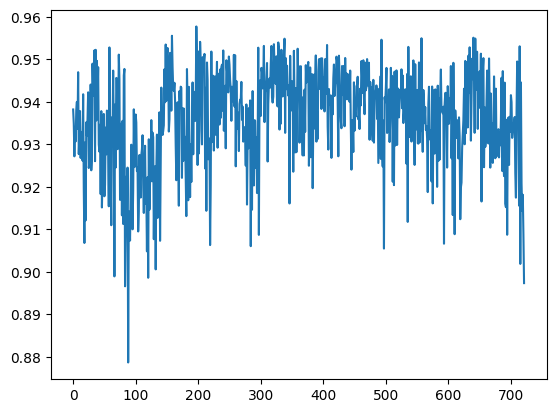

In [11]:
plt.plot(sparsity)